# Data Loading

## Dataset Source
 https://www.kaggle.com/datasets/lainguyn123/student-performance-factors/data

[Link Tableau](https://public.tableau.com/views/DashboardMilestone/DashboardStudentPerforma?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

## Dataset Description
 This dataset contains various factors that affect students' academic performance, measured by Exam Score as the target variable. This dataset can be used to analyse how factors such as study time, attendance, parental support, internet access and extracurricular activities contribute to students' exam results.

## Column Descriptions:

Hours_Studied - The number of hours spent studying per week.

Attendance - The percentage of classes attended.

Parental_Involvement - 	The level of parental involvement in the student's education (Low, Medium, High).

Access_to_Resources	- The availability of educational resources (Low, Medium, High).

Extracurricular_Activities - Participation in extracurricular activities (Yes, No).

Sleep_Hours	- The Average hours of sleep per night.

Previous_Scores	- Source from previous Exam.

Motivation_Level - 	The student's level of motivation (Low, Medium, High).

Internet_Access	- Availability of internet access (Yes, No).

Tutoring_Sessions - The number of tutoring sessions attended per month.

Family_Income - The family's income level (Low, Medium, High).

Teacher_Quality	- The quality of the teachers (Low, Medium, High).

School_Type	- The type of school attended (Public, Private).

Peer_Influence - The type of school attended (Public, Private).

Physical_Activity - The average number of hours of physical activity per week.

Learning_Disabilities - Presence of learning disabilities (Yes, No).

Parental_Education_Level - The highest level of parental education (High School, College, Postgraduate).

Distance_from_Home - Distance from home to school (Near, Moderate, Far).

Gender - The student's gender (Male, Female).

Exam_Score - The Final Exam score.

# Define Library

In [13]:
import pandas as pd  # Library for data manipulation and analysis.

import plotly.express as px # Library for creating interactive visualizations.

import numpy as np  # Library for numerical computing in Python.

import matplotlib.pyplot as plt # Library for creating static, interactive, and animated visualizations in Python.

import seaborn as sns # Library for statistical data visualization built on top of Matplotlib.

from sklearn.preprocessing import StandardScaler # Module for data preprocessing, specifically feature scaling.

from scipy import stats # Library for scientific and technical computing.

### Read CSV file

In [14]:
# Read CSV file "StudentPerformanceFactors.csv" and save it to dataframe using 'df' as name.
df = pd.read_csv("StudentPerformanceFactorsfix.csv")


In [15]:
# Show the DataFrame
df

,Unnamed: 0,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,...,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0,23,84,Low,High,No,7,73,Low,Yes,...,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,1,19,64,Low,Medium,No,8,59,Low,Yes,...,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,...,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,3,29,89,Low,Medium,Yes,8,98,Medium,Yes,...,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,...,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6373,6602,25,69,High,Medium,No,7,76,Medium,Yes,...,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6374,6603,23,76,High,Medium,No,8,81,Medium,Yes,...,Low,High,Public,Positive,2,No,High School,Near,Female,69
6375,6604,20,90,Medium,Low,Yes,6,65,Low,Yes,...,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6376,6605,10,86,High,High,Yes,6,91,High,Yes,...,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


### Data Cleaning

In [16]:
# Checking whether the data types in all columns in the table are correct and checking whether there are missing values or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  6378 non-null   int64 
 1   Hours_Studied               6378 non-null   int64 
 2   Attendance                  6378 non-null   int64 
 3   Parental_Involvement        6378 non-null   object
 4   Access_to_Resources         6378 non-null   object
 5   Extracurricular_Activities  6378 non-null   object
 6   Sleep_Hours                 6378 non-null   int64 
 7   Previous_Scores             6378 non-null   int64 
 8   Motivation_Level            6378 non-null   object
 9   Internet_Access             6378 non-null   object
 10  Tutoring_Sessions           6378 non-null   int64 
 11  Family_Income               6378 non-null   object
 12  Teacher_Quality             6378 non-null   object
 13  School_Type                 6378 non-null   obje

In [17]:
df = df.drop(columns=['Unnamed: 0'])
print(df.columns)

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')


In [18]:
# Summary statistics for numeric columns
print(df.describe().T)

                    count       mean        std   min   25%   50%   75%    max
Hours_Studied      6378.0  19.977109   5.985460   1.0  16.0  20.0  24.0   44.0
Attendance         6378.0  80.020853  11.550723  60.0  70.0  80.0  90.0  100.0
Sleep_Hours        6378.0   7.034964   1.468033   4.0   6.0   7.0   8.0   10.0
Previous_Scores    6378.0  75.066165  14.400389  50.0  63.0  75.0  88.0  100.0
Tutoring_Sessions  6378.0   1.495296   1.233984   0.0   1.0   1.0   2.0    8.0
Physical_Activity  6378.0   2.972719   1.028926   0.0   2.0   3.0   4.0    6.0
Exam_Score         6378.0  67.252117   3.914217  55.0  65.0  67.0  69.0  101.0


```
Checking and There are missing values in 3 columns in the table, in the Teacher_Quality, Parental_Education_Level, Distance_from_Home columns.
```

In [19]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

```
There are 78 rows with blank values in the Teacher_Quality column, 90 rows with blank values in the Parental_Education_Level column, and 67 rows with blank values in the Distance_from_Home column.
```

In [20]:
# Delete rows that have missing values in the ‘Teacher_Quality’, ‘Parental_Education_Level’, and ‘Distance_from_Home’ columns.
# After this process, only rows with complete data in the column will remain in the DataFrame.

df = df.dropna(subset = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home'])

# Ensure that there are no more missing values in the DataFrame after the deletion operation.
# The isnull() function counts the number of NaN (empty) values in each column, and sum() aggregates them.
print(df.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


```
Now the data is ready to be processed and analysed
```

### Analysis and calculation

#### Do students with parents who have a university degree perform better than students with parents who do not have a degree?

In [21]:
df['Parental_Education_Level'].unique()

array(['High School', 'College', 'Postgraduate'], dtype=object)

In [22]:
fig = px.box(df, x="Parental_Education_Level", y="Exam_Score",
             color="Parental_Education_Level", # Give a different colour for each category
             title="Exam Score Base on Parents Education",
             labels={"Parental_Education_Level": "Parents Education", "Exam_Score": "Exam Score"})

fig.update_layout(xaxis_title="Parents Education", yaxis_title="Exam Score") # Other options for labelling

fig.show()

The first quartile and third quartile are higher for the Higher Education group, implying that students with parents who completed Higher Education programmes tend to perform consistently better than students whose parents' highest level of education is High School.

#### How is the distribution of Sleep_Hour data in the dataset

In [23]:
df_sleep = df.sort_values(by=['Sleep_Hours'])

In [24]:
sleep_frec = df_sleep['Sleep_Hours'].value_counts(sort=False)

<Axes: >

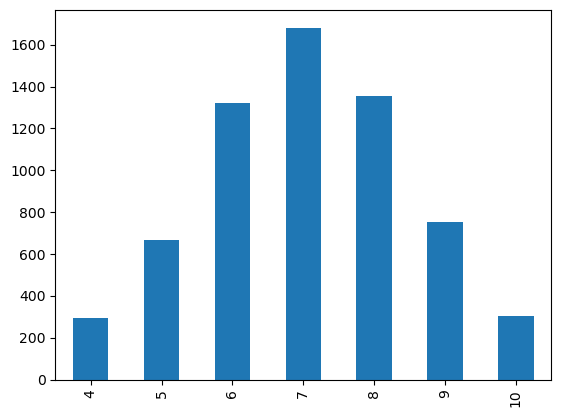

In [25]:
sleep_frec.plot(kind='bar')

The bar chart visualises the frequency of the total data by sleeping hours. It can be seen that 7 hours of sleep is the most common with a frequency of almost 1800, followed by 6 and 8 hours which also have high frequencies above 1200. 4 and 10 hours of sleep are recorded the least, below 400, indicating that these extreme hours of sleep are rare in the data. The frequency distribution of these sleeping hours is positively skewed, where the decrease in frequency after 7 hours is more gentle than the increase in frequency before 7 hours. In summary, the majority of the data shows sleeping hours between 6 and 8 hours, with 7 hours being the most dominant.

#### How is the distribution of Exam Score data in the dataset

In [26]:
df_sorted = df.sort_values(by=['Exam_Score'])

In [27]:
exam_frec = df_sorted['Exam_Score'].value_counts(sort=False)
exam_frec.head()

55     1
56     1
57     4
58    21
59    39
Name: Exam_Score, dtype: int64

<Axes: >

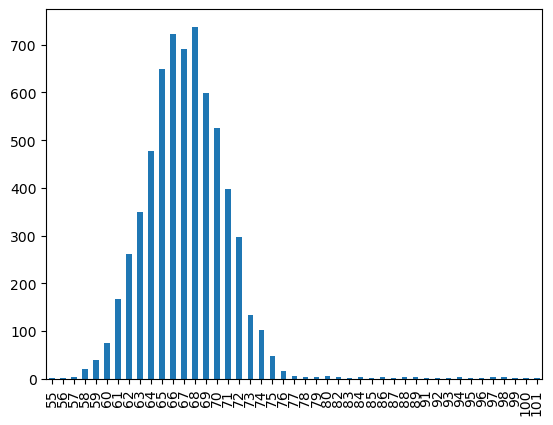

In [28]:
exam_frec.plot(kind='bar')

The bar chart illustrates the frequency distribution of exam scores. It can be seen that the exam scores are concentrated around 70, with the highest frequency, forming a bell curve pattern close to a normal distribution. Scores 55 and 56 appear only once, indicating very rare cases. An increase in frequency is seen starting from 57, increasing rapidly to peak around 70, then decreasing gradually to higher values. This indicates that most students scored around the 60s to 80s range, with the largest concentration around 70, and fewer students scoring below 60 or above 80. In summary, the distribution of test scores tends to be symmetrical with a centre around 70, indicating generally good student performance with some variation at either end.

#### How is the distribution of Internet Access data in the dataset

In [29]:
df_access = df.sort_values(by=['Internet_Access'])

In [30]:
access_frec = df_access['Internet_Access'].value_counts(sort=False)

<Axes: ylabel='Internet_Access'>

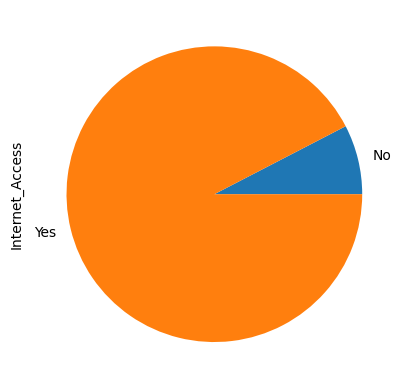

In [31]:
access_frec.plot(kind='pie')

This Pie Chart visualises the proportion of internet access in the data. There is a very noticeable difference between the proportion who have internet access (‘Yes’) and those who do not (‘No’). The section representing ‘Yes’ is much larger at around 90%, dominating most of the circle, indicating that a large majority of the data has internet access. In contrast, the ‘No’ part is very small, indicating that only a small portion of the data does not have internet access, only about 50%. In summary, this visualisation clearly shows that internet access is very common in this dataset.

#### How is the distribution of Parental Education Level data in the dataset

In [32]:
df_parent = df.sort_values(by=['Parental_Education_Level'])

In [33]:
parent_frec = df_parent['Parental_Education_Level'].value_counts(sort=False)

<Axes: >

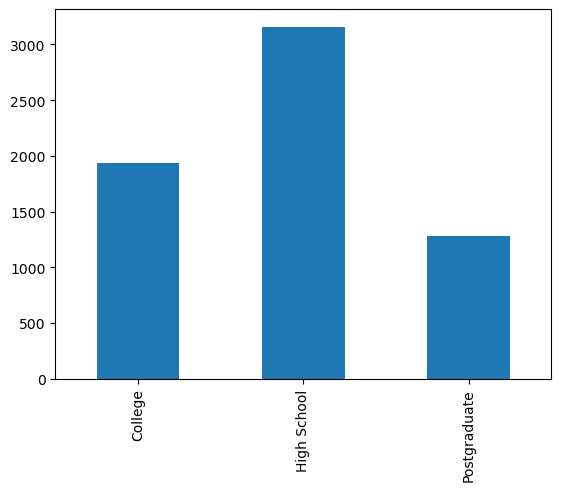

In [34]:
parent_frec.plot(kind='bar')

This bar chart illustrates the frequency of parental education level. It can be seen that the most common parental education level recorded in the data is that of a High School graduate, with a frequency of over 3000. The number of parents with a College education level is also quite large, approaching 2000. Meanwhile, the number of parents with a Postgraduate education level is the least, in the range of 1000-1500. In summary, the majority of parents in this data have a high school education, followed by College, and the least is Postgraduate.

#### Whether students who attended more than or equal to 5 tutoring sessions benefited from it

In [35]:
# upper bound = sessions >= 5
upper = df[df['Tutoring_Sessions'] >= 5]
# lower bound = sessions < 5
lower = df[df['Tutoring_Sessions'] < 5]

print(upper['Exam_Score'].mean())
print(lower['Exam_Score'].mean())

69.49606299212599
67.2065269556871


Text(0.5, 0, 'Tutor Session')

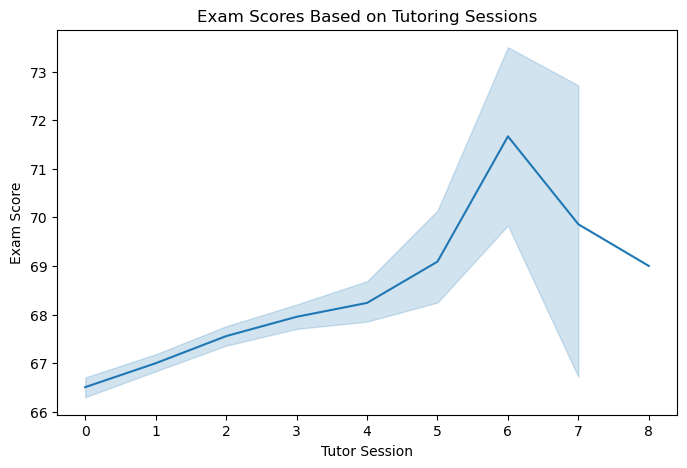

In [36]:
plt.figure(figsize=(8, 5))

sns.lineplot(x='Tutoring_Sessions', y='Exam_Score', data=df)

plt.title('Exam Scores Based on Tutoring Sessions')
plt.ylabel('Exam Score')
plt.xlabel('Tutor Session')


From the graph, we can see that having more tutoring sessions (around 6-7 sessions) clearly helps student achievement.

### 5. 7. Analisis sentral tendensi dari Attendance

In [37]:
mean_attendance = df['Attendance'].mean()
median_attendance = df['Attendance'].median()
mode_attendance = df['Attendance'].mode()[0]  
# ambil mode pertama kalau ada banyak mode

# Gabungin semua hasilnya jadi tampil barengan
print(f"Mean Attendance: {mean_attendance:.2f}")
print(f"Median Attendance: {median_attendance:.2f}")
print(f"Mode Attendance: {mode_attendance:.2f}")


Mean Attendance: 80.02
Median Attendance: 80.00
Mode Attendance: 67.00


The average student attendance rate was 80%, with the same median (80%). However, the mode is 67%, indicating the peak of the distribution is in the range of 65-70%. This indicates most students tend to be below average-high scores belonging to a small group of students raise the overall average.

### Inference Statistic Analysis

Null Hypothesis (H₀): There is no correlation between ‘Attendance’ and ‘Exam_Score’.

Alternative Hypothesis (H₁): There is a correlation between ‘Attendance’ and ‘Exam_Score’. 

In [43]:
# Pearson correlation (cocok kalau data kira-kira linear)
corr_pearson, pval_pearson = stats.pearsonr(df['Attendance'], df['Exam_Score'])

print(f"Pearson correlation: {corr_pearson:.2f}, p-value: {pval_pearson:.4f}")

Pearson correlation: 0.58, p-value: 0.0000


In [44]:
# Spearman correlation (cocok kalau data monotonic tapi nggak harus linear)
corr_spearman, pval_spearman = stats.spearmanr(df['Attendance'], df['Exam_Score'])

print(f"Spearman correlation: {corr_spearman:.2f}, p-value: {pval_spearman:.4f}")


Spearman correlation: 0.67, p-value: 0.0000


The Attendance → Exam Score relationship is monotonic but not perfectly linear and prone to outliers; therefore the Spearman correlation (ρ ≈ 0.67) provides a more accurate and robust picture than Pearson.

In [46]:
df.to_csv("StudentPerformanceFactorsfix.csv")

Export the latest csv for use in Tableau.

## Conclusion

Analysis of this data highlighted several factors related to student performance. Parental education level appears to be influential, with students with highly educated parents tending to have consistently better grades. The majority of students had between 6 to 8 hours of sleep, with 7 hours being the most common. The distribution of test scores shows a pattern close to a normal distribution, concentrated around a score of 70, signalling generally good performance. Internet access was also very common among the student data. Tutoring is shown to have a positive impact on grades, especially around 6-7 sessions. Finally, attendance had a moderate positive correlation with test scores, with better attendance tending to be associated with higher scores.

Overall, this analysis shows that factors such as parents‘ educational background, adequate sleep, internet access, participation in tutoring, and class attendance play an important role in students’ academic performance. The findings emphasise the importance of support from home, healthy sleep habits, access to resources, and active participation in learning activities to achieve optimal learning outcomes.

## Recomendation

Berdasarkan analisis yang kita lakukan, berikut saran untuk meningkatkan prestasi belajar siswa:

1. Jalin kemitraan antara sekolah dan orang tua untuk memberi dukungan khusus bagi anak-anak dari keluarga dengan latar belakang pendidikan terbatas, misalnya lewat program kakak asuh atau les tambahan.

2. Sosialisasikan pentingnya tidur berkualitas (6-8 jam) dan ajarkan siswa cara mengatur waktu serta kebiasaan tidur yang sehat.

3. Pastikan semua siswa punya akses internet memadai, baik dengan menyediakan WiFi di sekolah atau menggandeng provider internet untuk paket terjangkau bagi keluarga kurang mampu.

4. Galakkan program bimbingan belajar yang bermutu dan terjangkau, terutama untuk siswa yang butuh bantuan ekstra.

5. Tekankan pentingnya kehadiran di kelas, pantau absensi secara rutin, dan berikan perhatian khusus pada siswa yang sering tidak masuk.

Dengan menerapkan langkah-langkah ini secara menyeluruh, kita bisa menciptakan suasana belajar yang lebih mendukung dan membantu siswa meraih hasil yang lebih baik.